In [1]:
import os
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np

In [2]:
class LogisticRegressionModel(nn.Module):
    def __init__(self,n_features):
        super(LogisticRegressionModel,self).__init__()
        self.linear = nn.Linear(n_features,1)
        
    def forward(self,x):
        y_pred = F.sigmoid(self.linear(x))
        y_pred = y_pred.squeeze(-1)
        return y_pred

In [3]:
n_features = 2
n_examples = 500
features_1 = np.random.normal(0,0.1,500)
features_2 = np.random.normal(1,0.1,500)
features_5 = np.append(features_1,features_2)
features_3 = np.random.normal(2,0.1,500)
features_4 = np.random.normal(3,0.1,500)
features_6 = np.append(features_3,features_4)
features = torch.from_numpy(np.vstack((features_5,features_6)).transpose()).to(torch.float32)
lables_1 = np.full(500,0)
lables_2 = np.full(500,1)
lables = torch.from_numpy(np.append(lables_1,lables_2).transpose()).to(torch.float32)

In [4]:
import matplotlib.pyplot as plt

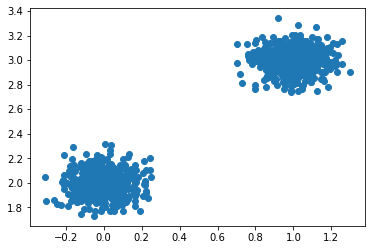

In [5]:
plt.scatter(features_5,features_6)
plt.show()

In [6]:
import torch.utils.data as Data

In [7]:
batch_size = 10
dataset = Data.TensorDataset(features,lables)
data_iter = Data.DataLoader(dataset,batch_size,shuffle=True)

In [8]:
model = LogisticRegressionModel(n_features)

In [9]:
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [10]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.1519, -0.1730]], requires_grad=True)
Parameter containing:
tensor([-0.4654], requires_grad=True)


In [11]:
criterion = torch.nn.BCELoss(size_average=False)

/opt/anaconda3/envs/test/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [12]:
from torch.nn import init

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [14]:
for epoch in range(1000):
    for x,y in data_iter:
        y_pred = model(x)
        loss = criterion(y_pred,y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(epoch,loss.item())

0 3.782285690307617
1 2.082516670227051
2 1.829182744026184
3 1.129987120628357
4 1.3593021631240845


/opt/anaconda3/envs/test/lib/python3.9/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


5 0.924453616142273
6 1.0563747882843018
7 0.736552357673645
8 0.7280099391937256
9 0.5243613123893738
10 0.6198099851608276
11 0.4193418025970459
12 0.454670250415802
13 0.36318692564964294
14 0.43466025590896606
15 0.27681460976600647
16 0.32342275977134705
17 0.4288075864315033
18 0.33640992641448975
19 0.3784460723400116
20 0.4305709898471832
21 0.4641188681125641
22 0.17224270105361938
23 0.33589616417884827
24 0.20982366800308228
25 0.2557400166988373
26 0.20200587809085846
27 0.25476086139678955
28 0.1406976580619812
29 0.18534767627716064
30 0.17844580113887787
31 0.28576821088790894
32 0.14344267547130585
33 0.1852959841489792
34 0.19435247778892517
35 0.15273091197013855
36 0.17564095556735992
37 0.12421970814466476
38 0.19440937042236328
39 0.17118047177791595
40 0.11383823305368423
41 0.10020780563354492
42 0.10067262500524521
43 0.13701491057872772
44 0.10435402393341064
45 0.10784226655960083
46 0.20476804673671722
47 0.13949362933635712
48 0.07795839756727219
49 0.119319

349 0.0371101014316082
350 0.03643467649817467
351 0.044073376804590225
352 0.012853365391492844
353 0.014147491194307804
354 0.01579335704445839
355 0.008010853081941605
356 0.014228727668523788
357 0.03360331058502197
358 0.015209939330816269
359 0.015793796628713608
360 0.05756370350718498
361 0.032969098538160324
362 0.04544482380151749
363 0.025038836523890495
364 0.016806740313768387
365 0.010555376298725605
366 0.058930229395627975
367 0.018481114879250526
368 0.006577012594789267
369 0.017550338059663773
370 0.05073589086532593
371 0.02059139497578144
372 0.013326178304851055
373 0.011814946308732033
374 0.04182819649577141
375 0.04043222963809967
376 0.005531275644898415
377 0.007550779264420271
378 0.011887235566973686
379 0.014990939758718014
380 0.024927997961640358
381 0.04227235168218613
382 0.013619518838822842
383 0.03668577969074249
384 0.012930457480251789
385 0.046219050884246826
386 0.011557912454009056
387 0.012544328346848488
388 0.01431657001376152
389 0.01912731

680 0.009944047778844833
681 0.016662249341607094
682 0.02287794090807438
683 0.01701541617512703
684 0.0041947392746806145
685 0.02203231304883957
686 0.026774847880005836
687 0.004190996289253235
688 0.01786022260785103
689 0.011819584295153618
690 0.003842231584712863
691 0.011125458404421806
692 0.008551007136702538
693 0.029294541105628014
694 0.006057318300008774
695 0.0036991548258811235
696 0.005211672745645046
697 0.02707764320075512
698 0.010937032289803028
699 0.00791659951210022
700 0.003561746096238494
701 0.004125356674194336
702 0.02281435951590538
703 0.008551273494958878
704 0.002151070162653923
705 0.009530013427138329
706 0.008367686532437801
707 0.017219215631484985
708 0.006887324154376984
709 0.010765983723104
710 0.029389655217528343
711 0.018781453371047974
712 0.007055977825075388
713 0.039447516202926636
714 0.008761689998209476
715 0.004191978834569454
716 0.008737470023334026
717 0.003645144635811448
718 0.047891389578580856
719 0.03613545745611191
720 0.010

In [15]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[15.6768,  0.8018]], requires_grad=True)
Parameter containing:
tensor([-9.5518], requires_grad=True)


In [16]:
test_1 = np.random.normal(0,0.2,100)
test_2 = np.random.normal(1,0.2,100)
test_3 = np.append(test_1,test_2)
test_4 = np.random.normal(2,0.2,100)
test_5 = np.random.normal(3,0.2,100)
test_6 = np.append(test_4,test_5)
test = torch.from_numpy(np.vstack((test_3,test_6)).transpose()).to(torch.float32)
test_lable_1 = np.zeros(100)
test_lable_2 = np.ones(100)
test_lable = torch.from_numpy(np.append(test_lable_1,test_lable_2).transpose()).to(torch.float32)

dataset_test = Data.TensorDataset(test,test_lable)

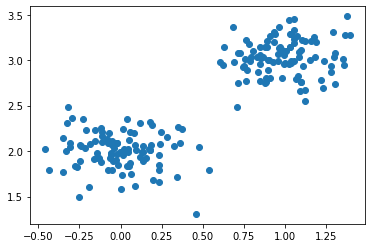

In [17]:
plt.scatter(test[:,0],test[:,1],cmap='RdYlGn')

In [18]:
for x,y in dataset_test:
    y_pred = model(x)
    print(y_pred,y)

tensor(0.0067, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(8.8021e-05, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(0.0027, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(3.4129e-06, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(0.0001, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(0.0189, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(0.0003, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(0.0007, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(0.0005, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(0.0003, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(1.5233e-05, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(4.3579e-05, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(3.4917e-05, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(0.0010, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(3.2030e-05, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(1.2787e-05, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(0.0008, grad_fn=<SqueezeBackward1>) tensor(0.)
tensor(0.0111, grad_fn=<SqueezeBackward1>) tensor(0.)


In [19]:
model(test)

tensor([6.7348e-03, 8.8021e-05, 2.7172e-03, 3.4129e-06, 1.4422e-04, 1.8945e-02,
        2.5475e-04, 7.4712e-04, 4.8573e-04, 2.5412e-04, 1.5233e-05, 4.3579e-05,
        3.4917e-05, 9.9002e-04, 3.2030e-05, 1.2787e-05, 7.8408e-04, 1.1130e-02,
        1.6106e-06, 5.6050e-04, 2.0863e-01, 4.3676e-06, 3.2625e-04, 1.4633e-04,
        8.5902e-06, 1.3457e-04, 9.7523e-02, 5.6476e-03, 1.2391e-02, 8.8904e-03,
        1.3753e-04, 1.0947e-04, 6.6690e-05, 1.6557e-02, 1.8605e-06, 6.6105e-04,
        2.6903e-03, 5.0484e-05, 1.9932e-04, 5.9684e-02, 1.3750e-02, 1.0812e-02,
        3.6127e-05, 5.6964e-02, 2.7817e-07, 1.0184e-03, 1.6238e-04, 1.5947e-04,
        1.6874e-04, 4.0333e-01, 2.1137e-03, 4.1611e-06, 1.4247e-03, 1.2745e-05,
        3.8063e-03, 5.3444e-04, 4.5179e-06, 5.8175e-01, 8.9372e-04, 3.4085e-04,
        1.5692e-03, 3.3094e-03, 3.6268e-05, 3.2276e-07, 1.2113e-04, 3.1171e-06,
        2.6727e-04, 2.8543e-06, 1.1830e-06, 1.2750e-01, 7.0858e-05, 1.2042e-04,
        1.6493e-04, 2.3790e-04, 2.6677e-